In [53]:
import re
import jieba
import jieba.posseg
import collections
import numpy as np
import PIL.Image as image
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [54]:
Analysis_text = 'amy上海.txt' 
StopWords = '停用词表.txt' 
number = 100  
Output = 'amy上海.txt'  
background = 'mask.png' 

In [55]:
fn = open(Analysis_text,'r',encoding = 'UTF-8')  # 打开文件
string_data = fn.read()                          # 读出整个文件
fn.close()       

In [56]:
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"')# 定义正则表达式匹配模式（空格等）
string_data = re.sub(pattern, '', string_data)

In [57]:
seg_list_exact = jieba.cut(string_data, cut_all=False, HMM=True)    # 精确模式分词+HMM
object_list = []

In [58]:
with open(StopWords, 'r', encoding='UTF-8') as meaninglessFile:
    stopwords = set(meaninglessFile.read().split('\n'))
stopwords.add(' ')
for word in seg_list_exact:         # 循环读出每个分词
    if word not in stopwords:       # 如果不在去除词库中
        object_list.append(word)    # 分词追加到列表

In [59]:
word_counts = collections.Counter(object_list)       # 对分词做词频统计
word_counts_top = word_counts.most_common(number)

In [64]:
# 英文词性转中文词性字典：详细版
En2Cn_Pro = {
    'a'    : '形容词',
    'ad'   : '形容词-副形词',
    'ag'   : '形容词-形容词性语素',
    'al'   : '形容词-形容词性惯用语',
    'an'   : '形容词-名形词',
    'b'    : '区别词',
    'bl'   : '区别词-区别词性惯用语',
    'c'    : '连词',
    'cc'   : '连词-并列连词',
    'd'    : '副词',
    'e'    : '叹词',
    'eng'  : '英文',
    'f'    : '方位词',
    'g'    : '语素',
    'h'    : '前缀',
    'i'    : '成语',
    'j'    : '简称略语',
    'k'    : '后缀',
    'l'    : '习用语',
    'm'    : '数词',
    'mq'   : '数量词',
    'n'    : '名词',
    'ng'   : '名词-名词性语素',
    'nl'   : '名词-名词性惯用语',
    'nr'   : '名词-人名',
    'nr1'  : '名词-汉语姓氏',
    'nr2'  : '名词-汉语名字',
    'nrf'  : '名词-音译人名',
    'nrfg' : '名词-人名',    
    'nrj'  : '名词-日语人名',
    'ns'   : '名词-地名',
    'nsf'  : '名词-音译地名',
    'nt'   : '名词-机构团体名',
    'nz'   : '名词-其他专名',
    'o'    : '拟声词',
    'p'    : '介词',
    'pba'  : '介词-“把”',
    'pbei' : '介词-“被”',
    'q'    : '量词',
    'qt'   : '量词-动量词',
    'qv'   : '量词-时量词',
    'r'    : '代词',
    'rg'   : '代词-代词性语素',
    'rr'   : '代词-人称代词',
    'rz'   : '代词-指示代词',
    'rzs'  : '代词-处所指示代词',
    'rzt'  : '代词-时间指示代词',
    'rzv'  : '代词-谓词性指示代词',
    'ry'   : '代词-疑问代词',
    'rys'  : '代词-处所疑问代词',
    'ryt'  : '代词-时间疑问代词',
    'ryv'  : '代词-谓词性疑问代词',
    's'    : '处所词',
    't'    : '时间词',
    'tg'   : '时间词-时间词性语素',
    'u'    : '助词',
    'ude1' : '助词-“的”“底”',
    'ude2' : '助词-“地”',
    'ude3' : '助词-“得”',
    'udeng': '助词-“等”“等等”“云云”',
    'udh'  : '助词-“的话”',
    'uguo' : '助词-“过”',
    'ule'  : '助词-“了”“喽”',
    'ulian': '助词-“连”',
    'uls'  : '助词-“来讲”“来说”“而言”“说来”',
    'usuo' : '助词-“所”',
    'uyy'  : '助词-“一样”“一般”“似的”“般”',
    'uzhe' : '助词-“着”',
    'uzhi' : '助词-“之”',
    'v'    : '动词',
    'vd'   : '动词-副动词',
    'vf'   : '动词-趋向动词',
    'vg'   : '动词-动词性语素',
    'vi'   : '动词-不及物动词（内动词）',
    'vl'   : '动词-动词性惯用语',
    'vn'   : '动词-名动词',
    'vshi' : '动词-“是”',
    'vx'   : '动词-形式动词',
    'vyou' : '动词-“有”',
    'w'    : '标点符号',
    'wb'   : '标点符号-百分号千分号，全角：％ ‰ 半角：%',
    'wd'   : '标点符号-逗号，全角：， 半角：,',
    'wf'   : '标点符号-分号，全角：； 半角： ; ',
    'wj'   : '标点符号-句号，全角：。',
    'wh'   : '标点符号-单位符号，全角：￥ ＄ ￡ ° ℃ 半角 $',
    'wkz'  : '标点符号-左括号，全角：（ 〔 ［ ｛ 《 【 〖 〈 半角：( [ { <',
    'wky'  : '标点符号-右括号，全角：） 〕 ］ ｝ 》 】 〗 〉 半角： ) ] { >',
    'wm'   : '标点符号-冒号，全角：： 半角： :',
    'wn'   : '标点符号-顿号，全角：、',
    'wp'   : '标点符号-破折号，全角：—— －－ ——－ 半角：—',
    'ws'   : '标点符号-省略号，全角：…… …',
    'wt'   : '标点符号-叹号，全角：！ 半角：!',
    'ww'   : '标点符号-问号，全角：？ 半角：?',
    'wyz'  : '标点符号-左引号，全角：“ ‘ 『',
    'wyy'  : '标点符号-右引号，全角：” ’ 』',
    'x'    : '字符串',
    'xu'   : '字符串-网址URL',
    'xx'   : '字符串-非语素字',
    'y'    : '语气词',
    'z'    : '状态词',
    'un'   : '未知词',
    'zg'   : '未知词'
}

In [65]:
print ('\n词语\t词频\t词性')
print ('——————————')
fileOut = open(Output,'w',encoding='UTF-8')     # 创建文本文件；若已存在，则进行覆盖
fileOut.write('词语\t词频\t词性\n')
fileOut.write('——————————\n')
count = 0
for TopWord,Frequency in word_counts_top:                       # 获取词语和词频
    for POS in jieba.posseg.cut(TopWord):                       # 获取词性
        if count == number:
            break
        print(TopWord + '\t',str(Frequency) + '\t',list(En2Cn_Pro.values())[list(En2Cn_Pro.keys()).index(POS.flag)])                    # 逐行输出数据
        fileOut.write(TopWord + '\t' + str(Frequency) + '\t' + list(En2Cn_Pro.values())[list(En2Cn_Pro.keys()).index(POS.flag)] + '\n') # 逐行写入str格式数据
        count += 1
fileOut.close()      


词语	词频	词性
——————————
名词	 25	 名词
—	 11	 字符串
动词	 6	 名词
字符串	 5	 名词
数词	 3	 名词
地名	 3	 名词
英文	 3	 名词-其他专名
词语	 2	 名词
词频	 2	 名词
词性	 2	 名词
10	 2	 数词
副词	 2	 名词
量词	 2	 名词
拟声词	 2	 名词
方位词	 2	 名词
形容词	 2	 名词
132	 1	 数词
专名	 1	 名词
吃	 1	 动词
上海	 1	 名词-地名
无锡	 1	 名词-地名
真的	 1	 副词
…	 1	 字符串
没有	 1	 动词
艾米	 1	 名词-人名
人名名	 1	 名词
人名名	 1	 名词
物价	 1	 名词
哈哈哈	 1	 拟声词
[	 1	 字符串
]	 1	 字符串
一个	 1	 数词
视频	 1	 名词
Amy51	 1	 英文
brunch51	 1	 英文
姐姐	 1	 名词
菜	 1	 名词
笑	 1	 动词
感觉	 1	 名词
之前	 1	 方位词
店	 1	 名词
说	 1	 动词
贵	 1	 形容词
小姐姐	 1	 名词-人名
名人	 1	 名词
名	 1	 量词
人名	 1	 名词
人名	 1	 量词
拍	 1	 动词



开始制作词云……
制作完成！


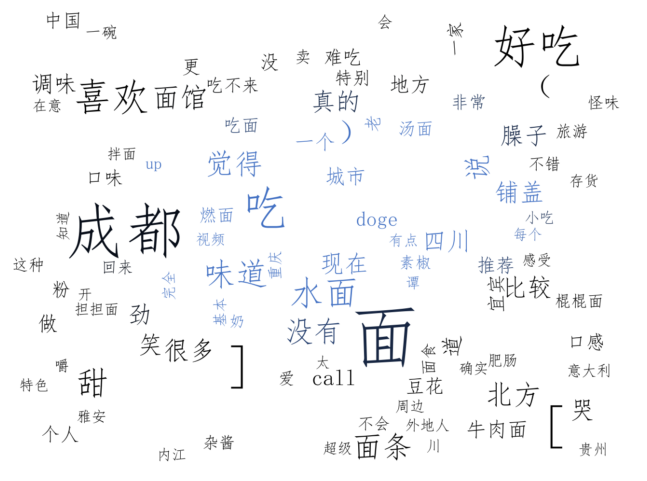

In [26]:
print ('\n开始制作词云……')                    # 提示当前状态
mask = np.array(image.open(background))      # 定义词频背景
wc = wordcloud.WordCloud(
    font_path = 'C:/Windows/Fonts/simfang.ttf', # 设置字体（这里选择“仿宋”）
    background_color='white',                   # 背景颜色
    mask = mask,                                # 文字颜色+形状（有mask参数再设定宽高是无效的）
    max_words = number,                         # 显示词数
    max_font_size = 150                         # 最大字号
)

wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
wc.recolor(color_func=wordcloud.ImageColorGenerator(mask))                       # 将词云颜色设置为背景图方案
plt.figure('词云')                                                               # 弹框名称与大小
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
plt.axis('off')                                                                  # 关闭坐标轴
print ('制作完成！') 
plt.show()  